In [3]:
import numpy as np
from skimage import io
from skimage.feature import graycomatrix, graycoprops
import math
from matplotlib import pyplot as plt

In [4]:
happy = ['0105', '0107', '0110']
neutral = ['0101', '0106', '0109']
sad = ['0106', '0107', '0110']

In [5]:
def create_pixel_matrix(emotion: str, number_images: list) -> list:
    images_pixel = []
    for i in range(len(number_images)):
        images_pixel.append(io.imread(f'datasets/{emotion}/{emotion}-{number_images[i]}.jpg', as_gray = True))
    return images_pixel

In [6]:
def show_histogram(emotion: str, number_images: list, image_pixel: list):
    for i in range(len(image_pixel)):
        plt.subplot(1, 2, 1)
        plt.imshow(image_pixel[i], cmap = 'gray')
        plt.title(f'{emotion}-{number_images[i]}')
        
        plt.subplot(1, 2, 2)
        plt.hist(image_pixel[i].ravel(), 256, [0, 255])
        plt.title(f'{emotion}-{number_images[i]} histogram')

        plt.show()

In [7]:
def first_order_statistics(image_pixel: list):
    hist, bins = np.histogram(image_pixel, 256, [0, 255])

    # mean
    # print(np.mean(image_pixel))
    hist_sum = sum(hist)
    hist_per_sum = []
    mean = 0
    for h in hist:
        hist_per_sum.append(h / hist_sum)
    for i in range(256):
        mean += hist_per_sum[i] * i

    print(mean)

    # variance
    # print(np.var(image_pixel))
    variance = 0
    for i in range(256):
        variance += (i - mean) ** 2 * hist_per_sum[i]
    print(variance)

    # skewness
    skewness = 0
    for i in range(256):
        skewness += (i - mean) ** 3 * hist_per_sum[i]
    skewness = skewness / (variance * math.sqrt(variance))
    print(skewness)

    # kurtosis
    kurtosis = 0
    for i in range(256):
        kurtosis += (i - mean) ** 4 * hist_per_sum[i]
    kurtosis = kurtosis / (variance ** 2) - 3
    print(kurtosis)

    # entropy
    entropy = 0
    for i in range(246):
        entropy += hist_per_sum[i] * math.log2(np.spacing(hist_per_sum[i]))
    entropy = -entropy
    print(entropy)

In [8]:
def glcm_calculation(pixel_image, dist = [5], angles = [0, np.pi / 4, np.pi / 3, 3 * np.pi / 4], level = 256, sym = True, norm = True):
    glcm = graycomatrix(pixel_image,
                        distances = dist,
                        angles = angles,
                        symmetric = sym,
                        normed = norm)
    return glcm

In [15]:
def glcm_features(glcm_matrix, props):
    features = []
    glcm_props = [property for name in props for property in graycoprops(glcm_matrix, name)[0]]
    for item in glcm_props:
        features.append(item)
    
    return features

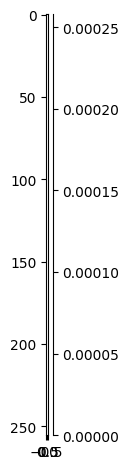

In [37]:
pixel_images = create_pixel_matrix('happy', happy)
glcm_matrix = glcm_calculation(pixel_images[0], dist=[1])
io.imshow(glcm_matrix[0])


In [35]:
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']
glcm_all_agls = []
glcm_all_agls.append(glcm_features(glcm_matrix, properties))

columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
# columns.append("label")
columns


AttributeError: 'list' object has no attribute 'dtype'

In [34]:

import pandas as pd 

# Create the pandas DataFrame for GLCM features data
glcm_df = pd.DataFrame(glcm_all_agls, 
                      columns = columns)

glcm_df

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
0,10.738918,15.094613,15.094613,15.987325,0.918852,0.815432,0.815432,0.816304,0.124583,0.101686,...,602.516976,599.168855,0.000511,0.000462,0.000462,0.000443,0.022606,0.021492,0.021492,0.021037
